## ipython notebook for `BlendingBathyERDC` examples

by Jonghyun Harry Lee

This notebook serves as an example of how to use the `BlendingBathyERDC` package and also can reproduce results presented in the manuscript:  

Lee et al, Blending Bathymetry: Combination of image-derived parametric approximations and celerity data sets for nearshore bathymetry estimation

In [1]:
!git clone https://github.com/jonghyunharrylee/blendbathyERDC.git

import os
if os.getcwd() != "/content/blendbathyERDC":
  %cd /content/blendbathyERDC

Cloning into 'blendbathyERDC'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 125 (delta 51), reused 50 (delta 13), pack-reused 0
Receiving objects: 100% (125/125), 6.65 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (51/51), done.
/content/blendbathyERDC



Note that in the current version, variables are read from pre-defined file names for development purposes, for example, 03272017cbathyv2_k.mat for frequency dependent wave number data $k_{f_B}$. The code will be updated to use the cBathy output mat file directly without any data preparation.


In [2]:
import numpy as np
import scipy as sp
print('numpy version:',np.__version__,'\nscipy version:',sp.__version__)

numpy version: 1.23.5 
scipy version: 1.11.3


In [3]:
import bathyblendingERDC as bathyinv

1. initialize with parameters
2. run blending `.blend()`

In [4]:
# use_testdata: 0 (default) => 03272017, 1 => 11222017, 2 => 10062019
params = {'use_testdata':0,'cbathy_dir':'./example/cbathy','pbt_dir':'./example/pbt','survey_dir':'./example/survey'}
#params = {'use_testdata':1,'cbathy_dir':'./example/cbathy','pbt_dir':'./example/pbt','survey_dir':'./example/survey'}
#params = {'use_testdata':2,'cbathy_dir':'./example/cbathy','pbt_dir':'./example/pbt','survey_dir':'./example/survey'}
DuckBathy = bathyinv.BathyBlending(params=params)
blend_bathy = DuckBathy.blend()

## 1. Initialize BathyBlending object
	- Loading Data... 
	- tide is set to -0.708 m
	- # of wave observations from cBathy phase 1: 22063
	- screening the wave obs with skill parameter (skill > 0.500000)
	- screening the wave obs with lam1 parameter (lam1 > 10.000000)
	- screening the wave obs whose direct inversion of the depth h is between hfB_min 0.250000 and hfB_max 10.000000
		- perform direct, point/freq-wise bathy inversion from cBathy wave data using least square
	- # of wave observations used in this run after screening: 17579
	- (optional) perform direct, point-wise bathy inversion from cBathy wave data using least square with equal weights over the nfB freqs (similar to cBathy Phase 2)
## 2. Perform blending 
	- observation error determined from cBathy Phase 1's kErr (obs_std_variable = True)

 GN iteration 1, misfit: 11490.123915, reg: 0.000000, obj: 5745.061958, rmse :0.140735
  inner cg iter 100, rel. res. (norm(res)/norm(g)): 2.2369e-03
  inner cg iter 200, rel. res. (no

/content/blendbathyERDC/bathyblendingERDC.py:942: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


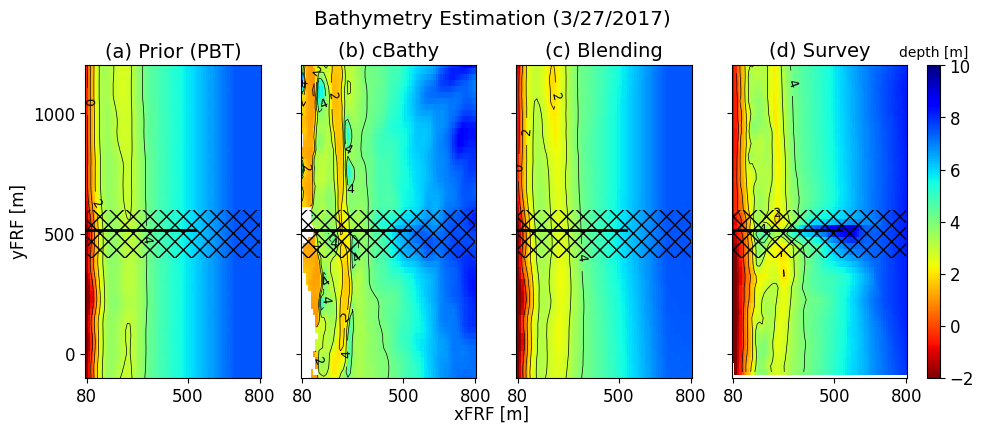

In [5]:
#DuckBathy.plot_bathy()

# try below for the paper figure reproduction
if params['use_testdata'] == 0:
  DuckBathy.plot_bathy(yFRF=(-100.,1200),pierFRFhatch=(400,600))
if params['use_testdata'] == 1:
  DuckBathy.plot_bathy(yFRF=(-100.,1500),pierFRFhatch=(400,600))
if params['use_testdata'] == 2:
  DuckBathy.plot_bathy(yFRF=(-100.,1350),pierFRFhatch=(400,600))

#DuckBathy.plot_bathy(yFRF=(-500.,1500),pierFRFhatch=(400,600))
#DuckBathy.plot_bathy(yFRF=(-100.,1200),pierFRFhatch=(400,600))
#DuckBathy.plot_bathy(yFRF=(600.,1300),pierFRFhatch=(400,600))

/content/blendbathyERDC/bathyblendingERDC.py:1066: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


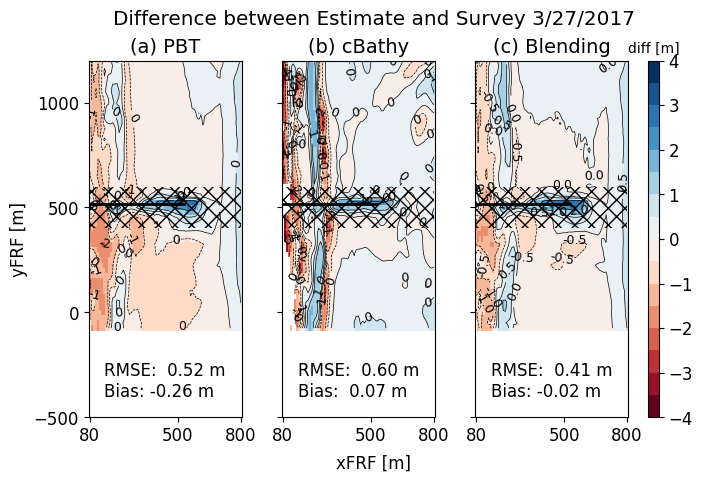

In [6]:
#DuckBathy.plot_bathy_error(pierFRF=None)

if params['use_testdata'] == 0:
  DuckBathy.plot_bathy_error(yFRF=(-500.,1200),pierFRFhatch=(400,600))
if params['use_testdata'] == 1:
  DuckBathy.plot_bathy_error(yFRF=(-500.,1500), pierFRFhatch=(400,600))
if params['use_testdata'] == 2:
  DuckBathy.plot_bathy_error(yFRF=(200.,1350), pierFRF=None, pierFRFhatch=None)


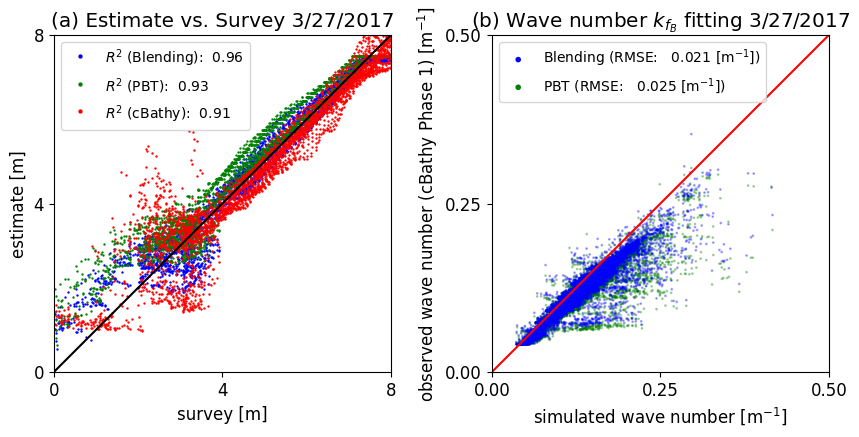

In [7]:
DuckBathy.plot_bathy_fitting_wavenumber()
#DuckBathy.plot_bathy_fitting()
#DuckBathy.plot_bathy_fitting_all()
#DuckBathy.plot_obs_fitting()

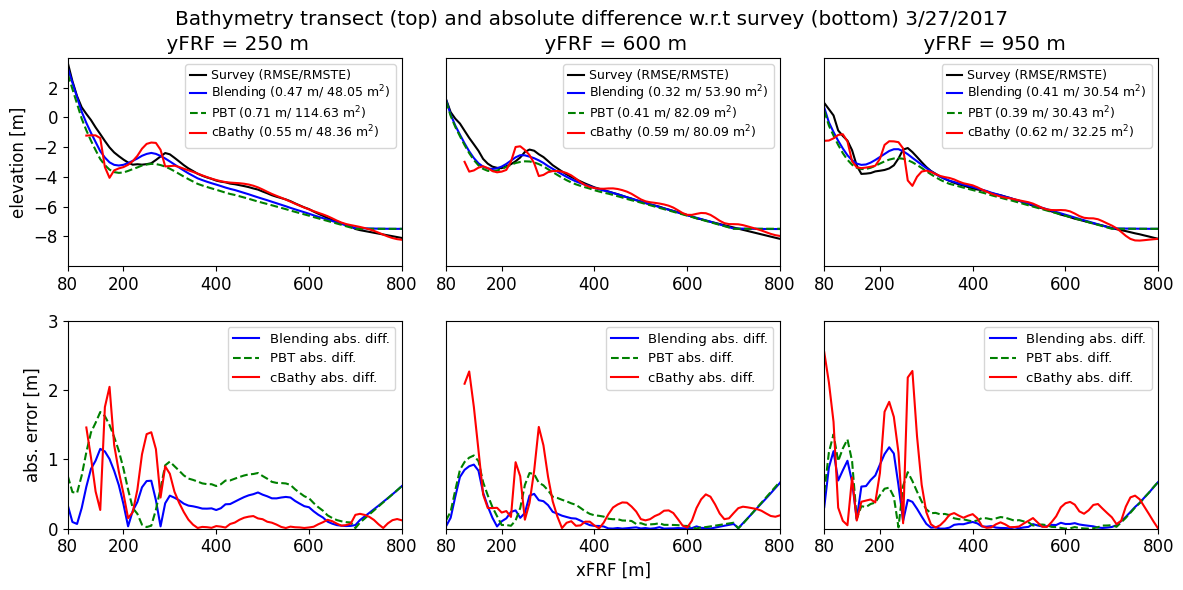

In [8]:
if params['use_testdata'] == 0: # 03/27/2017
  DuckBathy.plot_transects([np.where(DuckBathy.y[0,:]==250)[0][0],np.where(DuckBathy.y[0,:]==600)[0][0],np.where(DuckBathy.y[0,:]==950)[0][0]],rmste_xend=350.)
elif params['use_testdata'] == 1: #11/22/2017
  DuckBathy.plot_transects([np.where(DuckBathy.y[0,:]==250)[0][0],np.where(DuckBathy.y[0,:]==600)[0][0],np.where(DuckBathy.y[0,:]==950)[0][0]],rmste_xend=400.)
else:
  DuckBathy.plot_transects([np.where(DuckBathy.y[0,:]==600)[0][0],np.where(DuckBathy.y[0,:]==950)[0][0]],rmste_xend=400.)

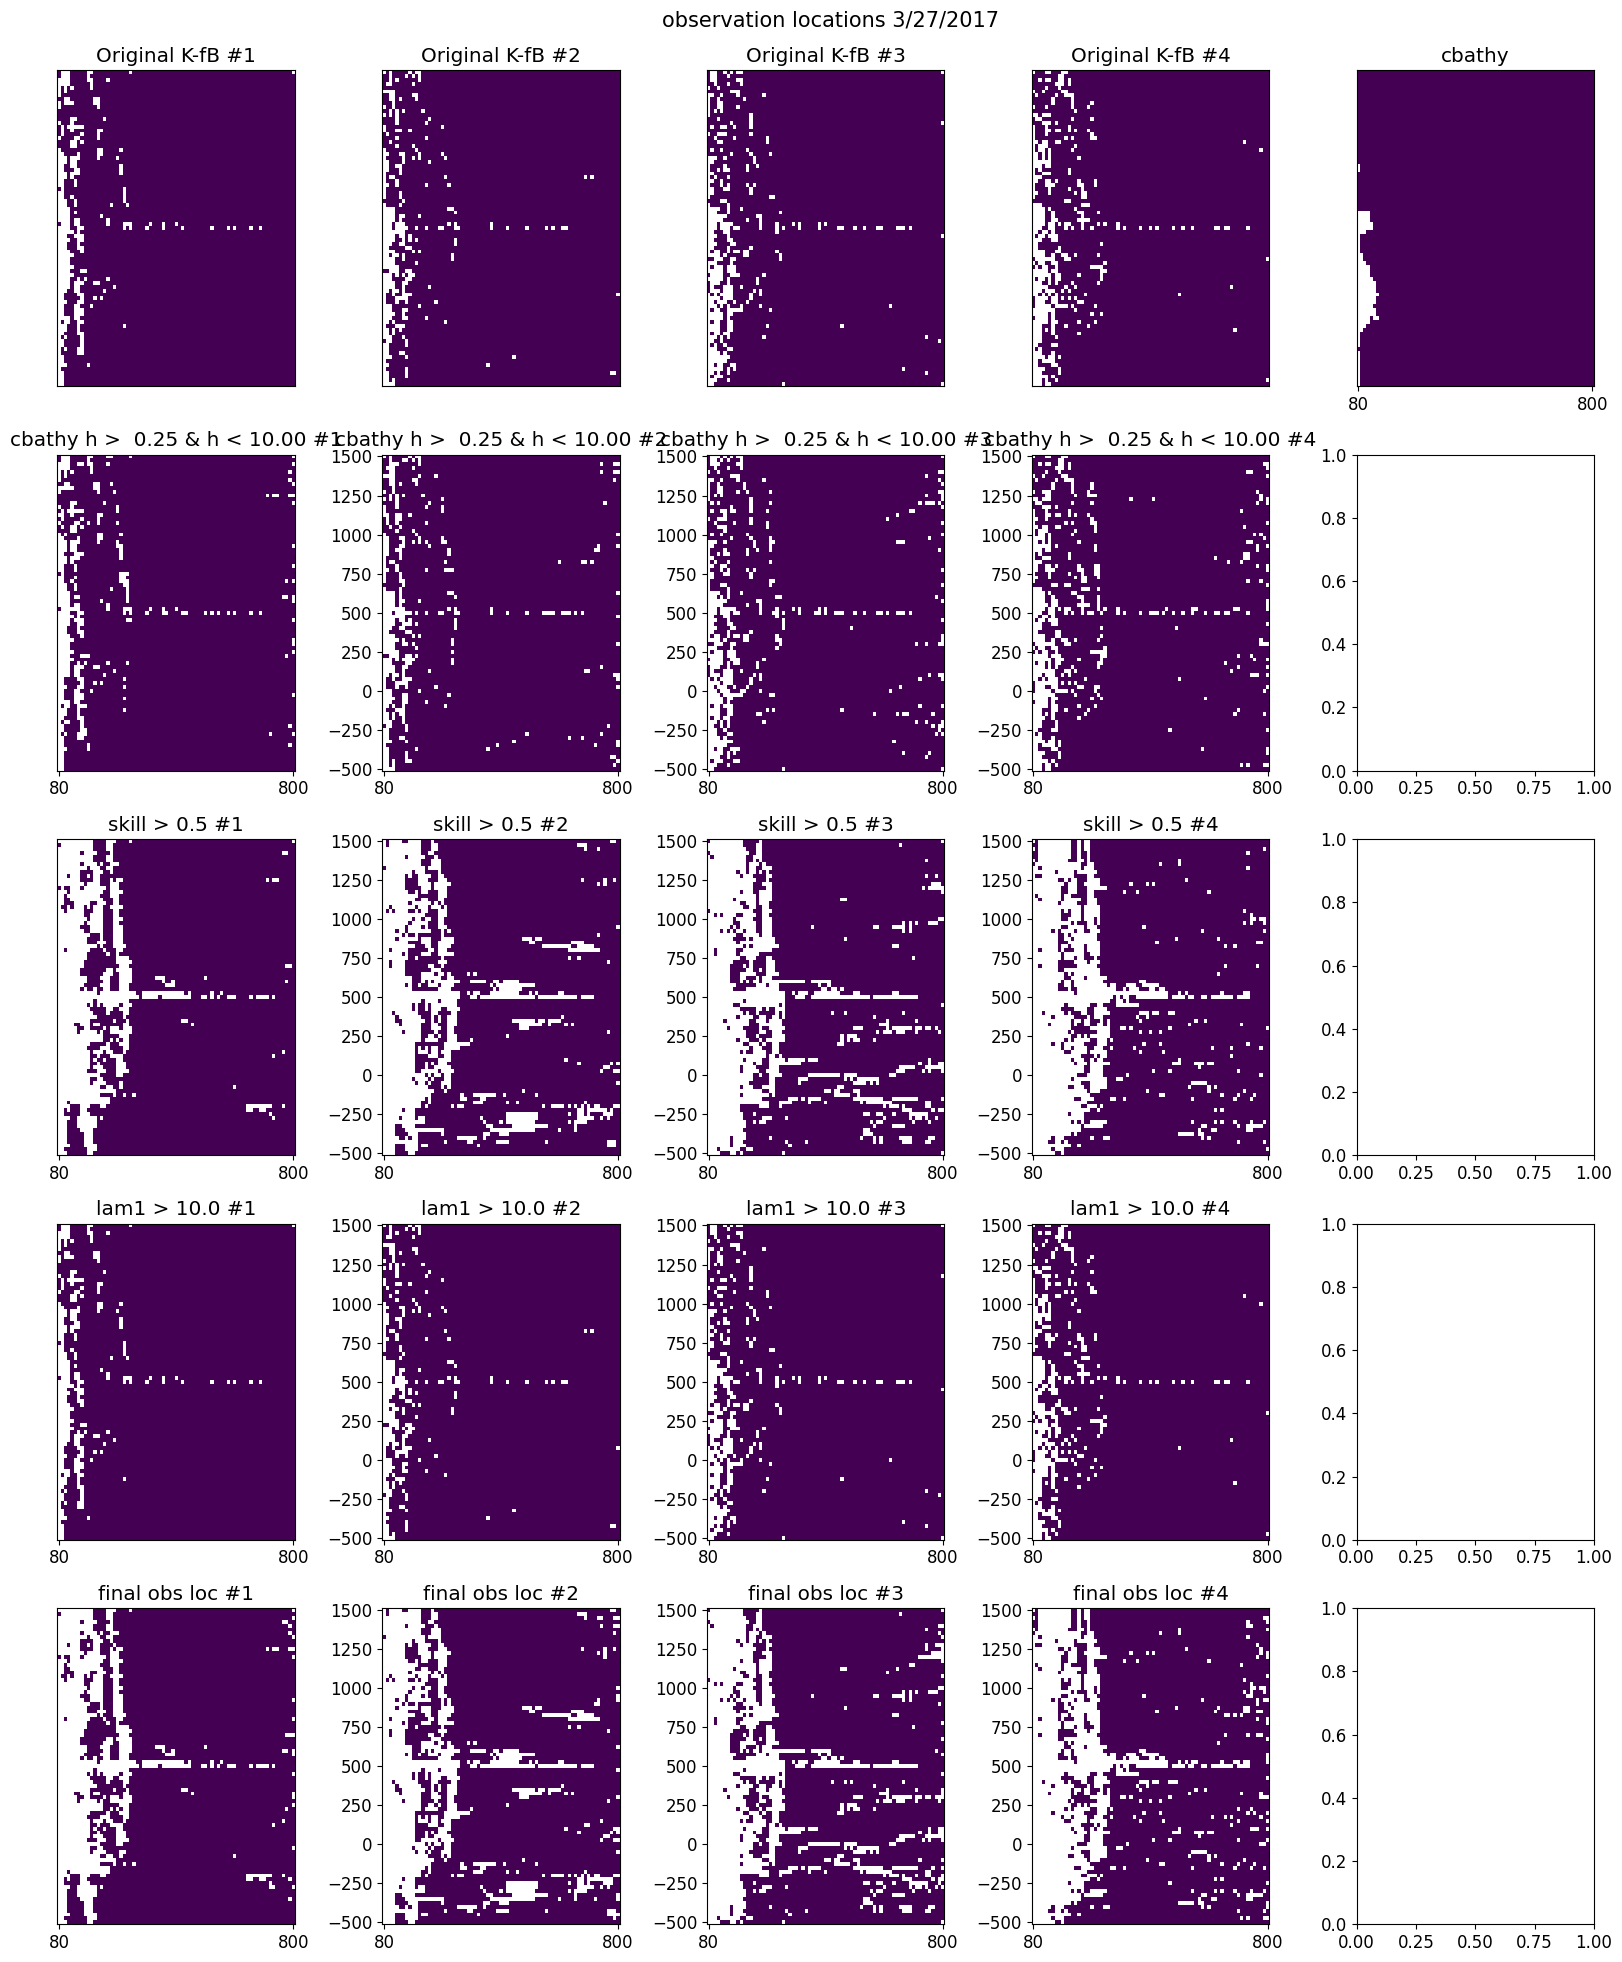

In [9]:
DuckBathy.plot_obslocs()

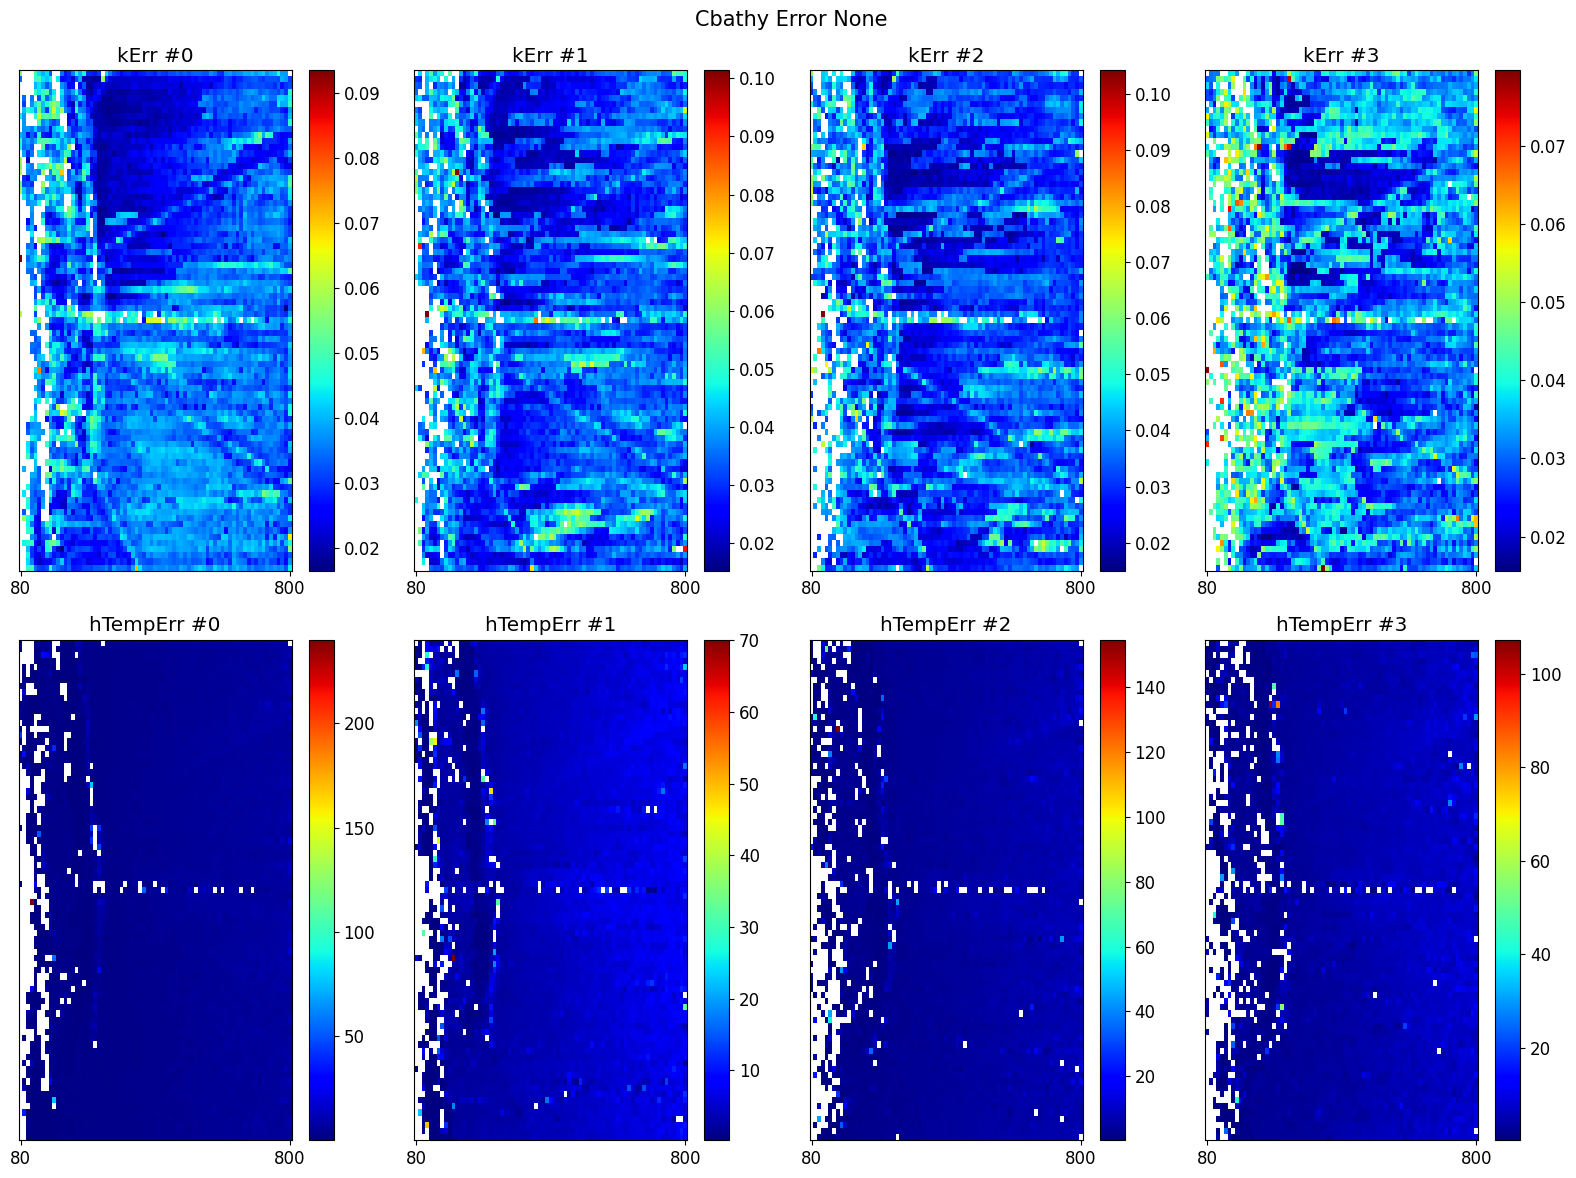

In [10]:
DuckBathy.plot_cbathy_errors()